In [4]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt


# Configuración para MinIO/S3
session = boto3.Session(
    aws_access_key_id='minio',
    aws_secret_access_key='minio123',
)
s3 = session.resource('s3', endpoint_url='http://localhost:9000')

# Cargar datos desde MinIO
obj = s3.Object('batch', 'predictions/predictions.csv')
df = pd.read_csv(obj.get()['Body'])  # Asignamos los datos a df

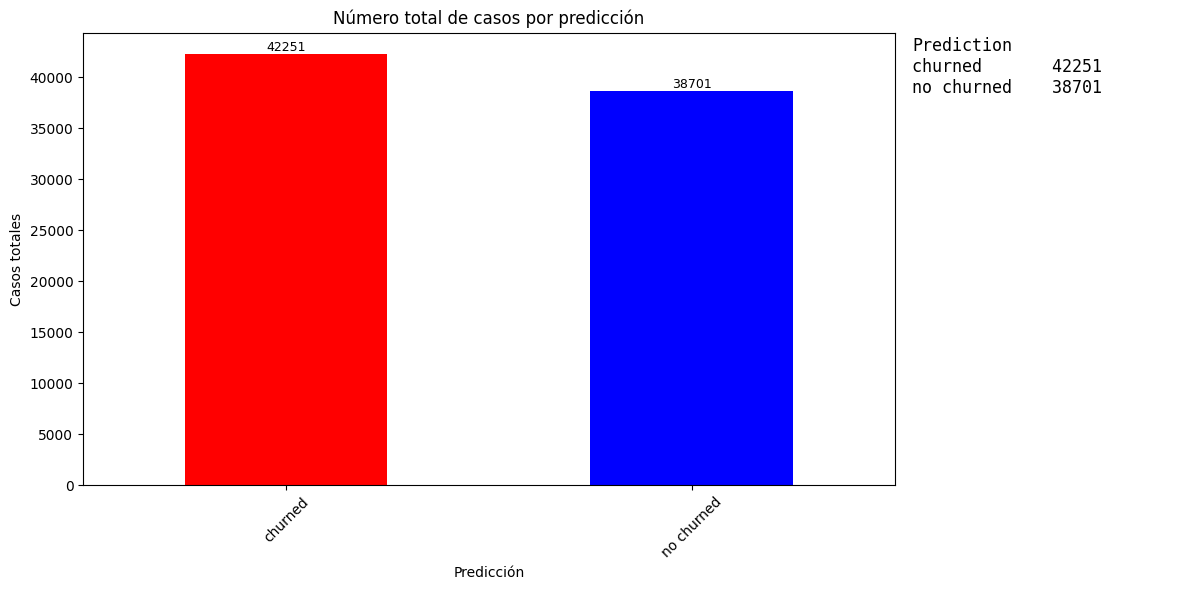

In [5]:
# Contar el número total de casos por cada valor
prediction_counts = df['Prediction'].value_counts()

# Crear una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

# Crear el gráfico de barras en el primer subplot
ax = prediction_counts.plot(kind='bar', color=['red', 'blue'], ax=axes[0])

# Añadir título y etiquetas
ax.set_title('Número total de casos por predicción')
ax.set_xlabel('Predicción')
ax.set_ylabel('Casos totales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Mostrar los valores sobre las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center',
                va='bottom',
                fontsize=9)

# Mostrar el DataFrame en el subplot derecho
axes[1].axis('off') 
table_text = prediction_counts.to_string(index=True)
axes[1].text(0.01, 0.99, table_text, transform=axes[1].transAxes, fontsize=12, verticalalignment='top', fontfamily='monospace')

# Ajustar la visualización
plt.tight_layout()
plt.show()
